In [12]:
import os
from os import path
import re

import numpy as np
import matplotlib.pyplot as plt

dire = '/home/lirfu/Desktop/dr/results_backup'
save_dir = '.ignore'

try:
    os.makedirs(save_dir)
except FileExistsError:
    pass

In [13]:
class9 = path.join(dire, 'noiseless_all_training_9class')
class256 = path.join(dire, 'noiseless_all_training_256class')

exp_name = 'gp_activation_taboo'

In [14]:
def get_data_common_best(root_dir, index):
    exp_name = "common_functions_v2"

    # Experiment list
    experiments = os.listdir(root_dir)
    exp_data = {}
    architectures = []
    functions = []

    for e in experiments:
        if not e.startswith(exp_name):
            continue	

        par = e.split(exp_name)[1]
        parts = par.split('_')

        arch = [int(s) for s_w in parts[1].split('-') for s in re.split('\(|\)', s_w) if s.isdigit()]
        func = parts[2].split('(')[0].split('[')[0]

        if str(arch) not in exp_data:
            exp_data[str(arch)] = []

        exp_data[str(arch)].append((e,func))

        if arch not in architectures:
            architectures.append(arch)
        if func not in functions:
            functions.append(func)

    architectures.sort(key=lambda x: len(x) * 1000000 + sum(x))  # Sort by depth and by number of neurons.
    for a in architectures:
        exp_data[str(a)].sort(key=lambda x: x[1])
    functions.sort()

    acc_data = []
    f1_data = []
    for a in architectures:
        acc_d = []
        f1_d = []
        t = exp_data[str(a)]
        if t is None:
            print('No experiments for:', str(a))
            continue

        for e in t:
            fil = os.path.join(root_dir,e[0])
            best_dir = [f for f in os.listdir(fil) if f.endswith('BEST')][0]

            fil = os.path.join(fil,best_dir,'results.txt')
            with open(fil) as f:
                for l in f:
                    if l.startswith('accuracy\t'):
                        acc_d.append(float(l.split('\t')[1]))
                    if l.startswith('f1\t'):
                        f1_d.append(float(l.split('\t')[1]))

        acc_data.append(acc_d)
        f1_data.append(f1_d)
        
    return acc_data[:][index], f1_data[:][index]

def add_to(acc, f1, path, index):
    d_acc, d_f1 = get_data_common_best(path, index)
    acc.insert(0, d_acc)
    f1.insert(0, d_f1)

In [15]:
def get_dirs(ds):
    dirs = []
    for d in os.listdir(ds):
        if d.startswith(exp_name):
            dirs.append(d)
    return sorted(dirs)

def parse_val(line):
    return float(re.compile(r'[: \t]+').split(line)[1])

def get_vals(ds):
    dirs = get_dirs(ds)
    
    t_acc = []
    t_f1 = []
    for d in dirs:
        p = path.join(ds, d)
        v_acc = []
        v_f1 = []
        for e in os.listdir(p):
            with open(path.join(p, e, 'results.txt')) as f:
                i = 0
                for l in f:
                    if i == 1:
                        v_acc.append(parse_val(l))
                    elif i == 4:
                        v_f1.append(parse_val(l))
                    i+=1
        t_acc.append(v_acc)
        t_f1.append(v_f1)
    return t_acc, t_f1

def boxplot(data, x_t, y_t, limits=(0, 1), name=None, labels=None):
    if not labels:
        labels = range(len(data))
    
    plt.figure(figsize=(8,6))
    plt.boxplot(data, notch=False, labels=labels, widths=.4,
                medianprops = dict(linestyle='-', linewidth=2, color='blue'))
    plt.ylim(limits[0], limits[1])
    plt.xlabel(x_t)
    plt.ylabel(y_t)
    #plt.xticks(range(1,1+data.shape[1]), range(data.shape[1]))
    plt.grid()
    #plt.scatter(range(1,1+data.shape[1]), np.max(data, axis=0), marker='x', color='red')
    #plt.scatter(range(1,1+data.shape[1]), np.min(data, axis=0), marker='.', color='blue')
    if name:
        plt.savefig(path.join(save_dir,name+'.pdf'), bbox_inches = 'tight', pad_inches = 0)
    plt.show()

# 9class

In [16]:
acc, f1 = get_vals(class9)

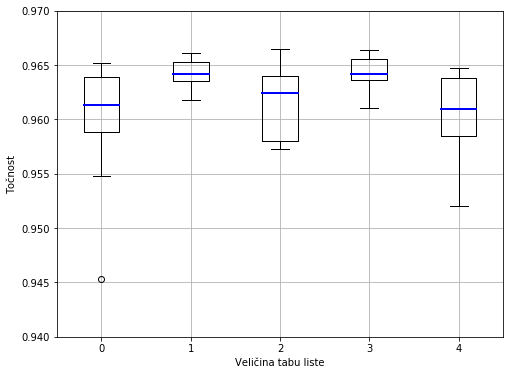

In [17]:
boxplot(acc, 'Veličina tabu liste', 'Točnost', limits=(0.94,  0.97), name='GP_9class_acc')

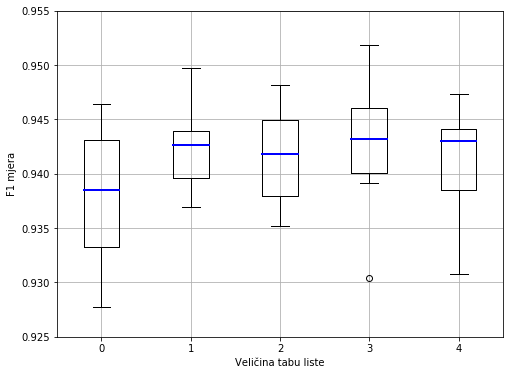

In [18]:
boxplot(f1, 'Veličina tabu liste', 'F1 mjera', limits=(0.925,  0.955), name='GP_9class_f1')

In [19]:
add_to(acc, f1, "/home/lirfu/Desktop/dr/results_backup/noiseless_all_training_9class/common_functions_v2", 5)
labels = ["Prethodno" if x<0 else x for x in range(-1,len(acc)-1)]

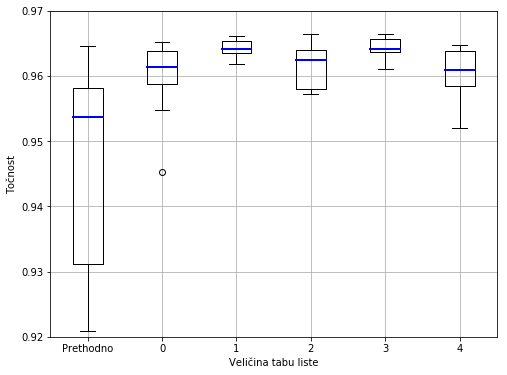

In [20]:
boxplot(acc, 'Veličina tabu liste', 'Točnost', limits=(0.92,  0.97), name='GP_9class_acc_plus',
       labels=labels)

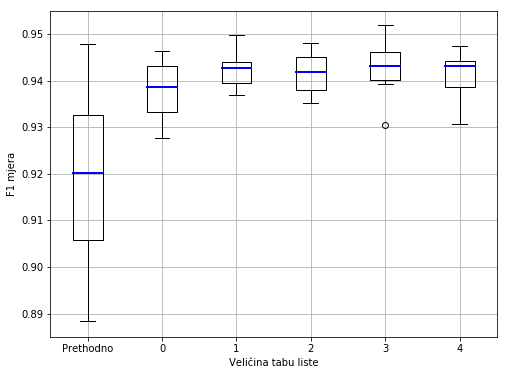

In [21]:
boxplot(f1, 'Veličina tabu liste', 'F1 mjera', limits=(0.885,  0.955), name='GP_9class_f1_plus',
       labels=labels)

# 256class

In [22]:
acc, f1 = get_vals(class256)

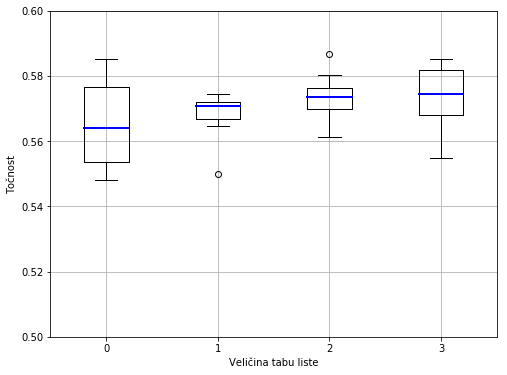

In [23]:
boxplot(acc, 'Veličina tabu liste', 'Točnost', limits=(0.5, 0.6), name='GP_256class_acc')

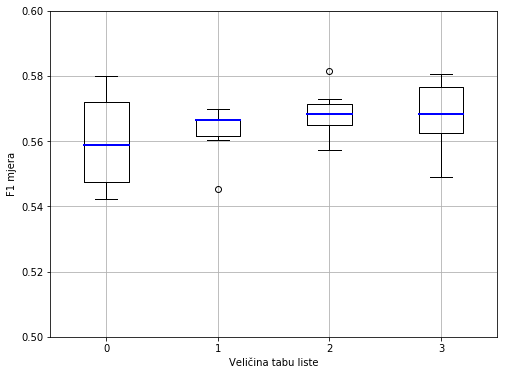

In [24]:
boxplot(f1, 'Veličina tabu liste', 'F1 mjera', limits=(0.5, 0.6), name='GP_256class_f1')

In [25]:
add_to(acc, f1, "/home/lirfu/Desktop/dr/results_backup/noiseless_all_training_256class/common_functions_v2", 2)
labels = ["Prethodno" if x<0 else x for x in range(-1,len(acc)-1)]

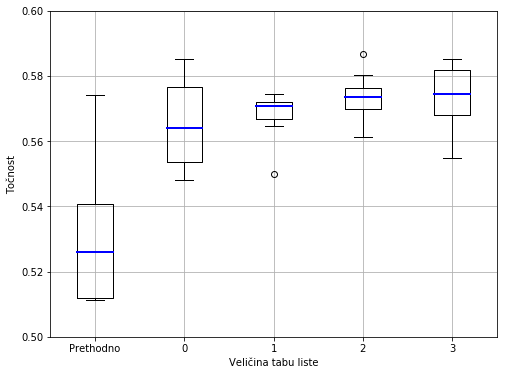

In [26]:
boxplot(acc, 'Veličina tabu liste', 'Točnost', limits=(0.5,  0.6), name='GP_256class_acc_plus',
       labels=labels)

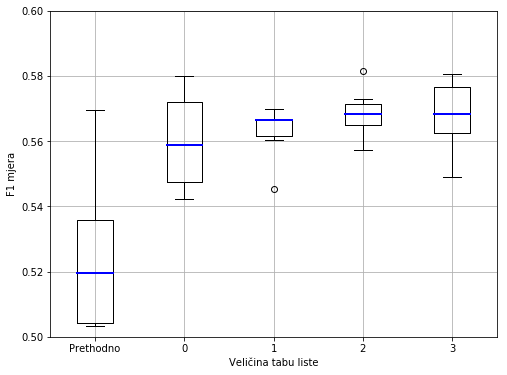

In [27]:
boxplot(f1, 'Veličina tabu liste', 'F1 mjera', limits=(0.5,  0.6), name='GP_256class_f1_plus',
       labels=labels)